In [ ]:
X_train, y_train, X_valid, y_valid = asd

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

model3 = GaussianProcessClassifier(1.0 * RBF(1.0))
model3.fit(X_train, y_train.argmax(axis=-1))
score = model3.score(X_valid, y_valid.argmax(axis=-1))

print(score)

In [ ]:
from sklearn.svm import SVC


model1 = SVC(gamma=3, C=1)
model1.fit(X_train, y_train.argmax(axis=-1))
score = model1.score(X_valid, y_valid.argmax(axis=-1))

print(score)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(3)
model2.fit(X_train, y_train)
score = model2.score(X_valid, y_valid)

print(score)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model4 = DecisionTreeClassifier(max_depth=5)
model4.fit(X_train, y_train)
score = model4.score(X_valid, y_valid)

print(score)

In [8]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np

rate, data = wav.read('/users/v1teka/Downloads/looperman-l-3280302-0291512-wheezy-beats-trap-loop.wav')
a = data.T[0]
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 
plt.show()

%matplotlib inline
plt.plot(data, np.abs(fft_out))
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method

In [18]:
mandolin_path = '/users/v1teka/Downloads/looperman-l-3280302-0291512-wheezy-beats-trap-loop.wav'
piano_path = '/users/v1teka/Downloads/looperman-l-3836200-0295221-nle-choppa-fuego-type-piano.wav'

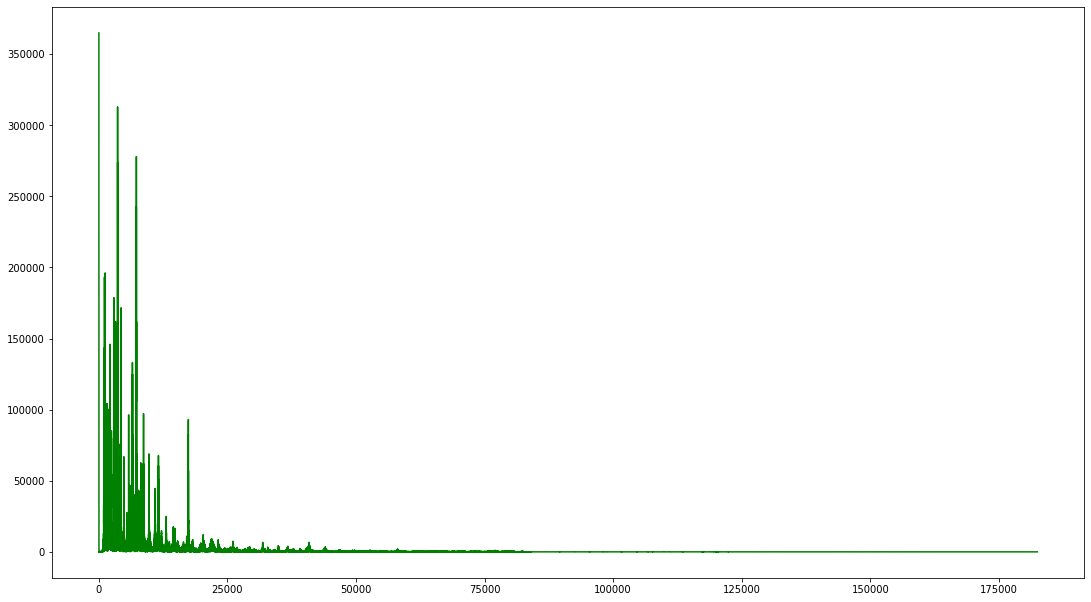

In [15]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
fs, data = wavfile.read(mandolin_path) # load the data
a = data.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
#plt.plot(abs(c[:(d-1)]),'r') 
plt.plot(abs(c[:(int(d)-1)]),'g')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

<ipython-input-16-d4eb020c1f95>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('/users/v1teka/Downloads/looperman-l-3836200-0295221-nle-choppa-fuego-type-piano.wav') # load the data


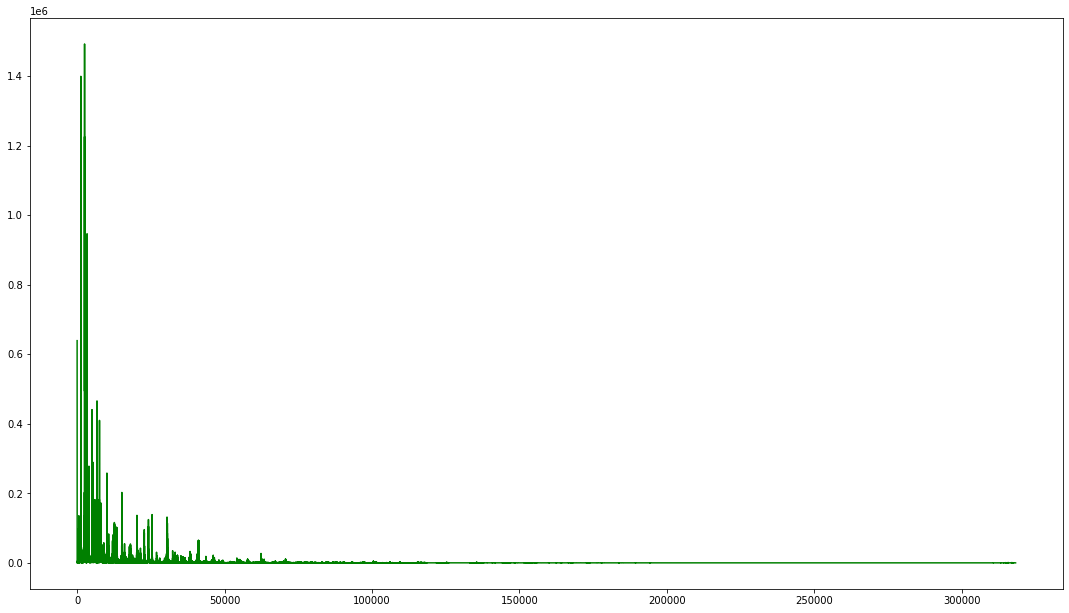

In [16]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
fs, data = wavfile.read(piano_path) # load the data
a = data.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
#plt.plot(abs(c[:(d-1)]),'r') 
plt.plot(abs(c[:(int(d)-1)]),'g')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

<ipython-input-17-85760e6595d8>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read('/users/v1teka/Downloads/looperman-l-3836200-0295221-nle-choppa-fuego-type-piano.wav')
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


ValueError: too many values to unpack (expected 2)

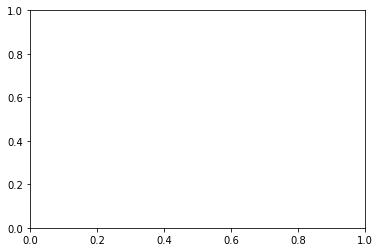

In [17]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('/users/v1teka/Downloads/looperman-l-3836200-0295221-nle-choppa-fuego-type-piano.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

<ipython-input-36-e888c31b68e4>:5: FutureWarning: Pass y=[-4.3796306e-05 -7.0938145e-06  4.3315751e-05 ... -3.0253591e-02
 -2.7448552e-02 -2.7689526e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr,n_mfcc=10)


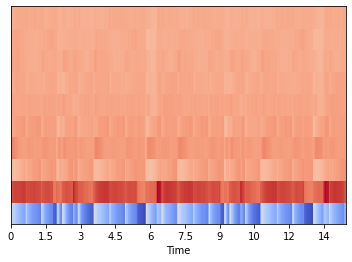

In [36]:
import librosa
import librosa.display
audio_path = piano_path
x, sr = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(x, sr=sr,n_mfcc=10)


librosa.display.specshow(mfccs, sr=sr, x_axis='time')

<ipython-input-38-9ec8bf220a93>:6: FutureWarning: Pass y=[-3.3700867e-06 -1.2841646e-05 -2.7030999e-05 ... -5.6904119e-05
 -7.3270880e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr,n_mfcc=20)


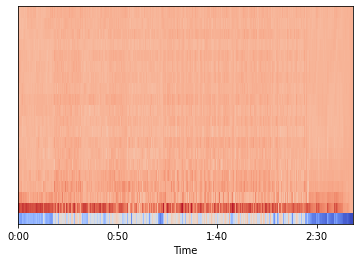

In [38]:
import librosa
import librosa.display

audio_path = '/users/v1teka/Downloads/Master.wav'
x, sr = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(x, sr=sr,n_mfcc=20)


librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [2]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)



100%|===================| 32503/32561 [01:09<00:00]        

In [7]:
import numpy as np

 99%|===================| 32180/32561 [01:08<00:00]        

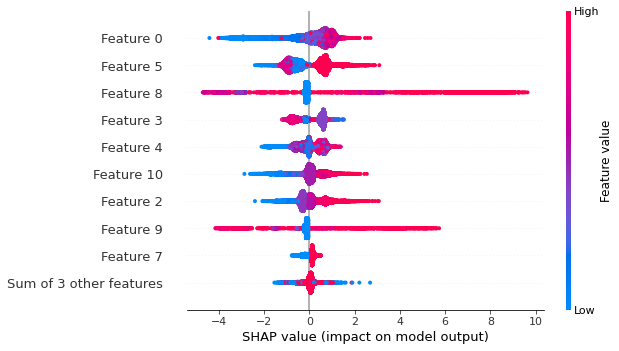

In [17]:

labels = []
for i in range(X.shape[1]):
    labels = np.append(labels, "Feature {}".format(i))


# compute SHAP values
explainer = shap.Explainer(model, X, feature_names=labels)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

In [16]:
X

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Feature 11
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39
